In [22]:
import pandas as pd
import seaborn as sns

/Users/jahyeon_gu/.pyenv/versions/anaconda3-2022.05/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [12]:
# 중고차 가격
df = pd.read_excel('dataset/car.xlsx')

In [13]:
df.head()

,mileage,model,price,year,my_car_damage,other_car_damage
0,63608,K3,970,2017,0,564596
1,69336,K3,1130,2015,1839700,1140150
2,36000,K3,1380,2016,446520,2244910
3,19029,K3,1390,2017,889000,4196110
4,97090,K3,760,2015,2339137,2029570


In [14]:
df.price.mean()

853.6605839416059

In [6]:
df.price.median()

805.0

In [7]:
df.price.sort_values()

253     190
259     220
260     230
267     250
266     250
       ... 
7      1599
106    1720
84     1799
120    1820
143    1820
Name: price, Length: 274, dtype: int64

In [9]:
df.model.value_counts()

Avante    205
K3         69
Name: model, dtype: int64

In [15]:
df.price.min()

190

In [16]:
df.price.max()

1820

In [17]:
# 50퍼센타일
df.price.quantile(.5)

805.0

In [18]:
# 90퍼센타일 = 상위 10%
df.price.quantile(.9)

1320.0

In [19]:
# 가격 범위 구하기
df.price.max() - df.price.min()

1630

In [21]:
df.price.quantile(.75) - df.price.quantile(.25)

470.0

<AxesSubplot:>

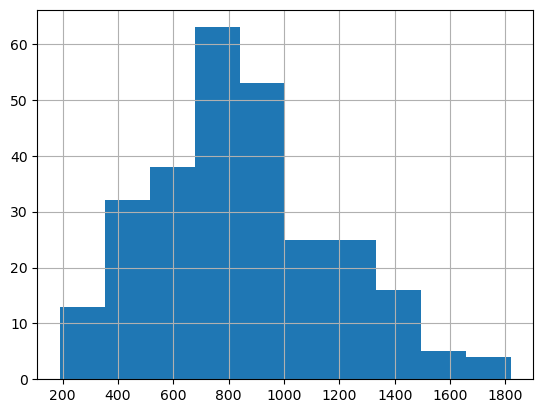

In [20]:
df.price.hist()

<AxesSubplot:xlabel='price'>

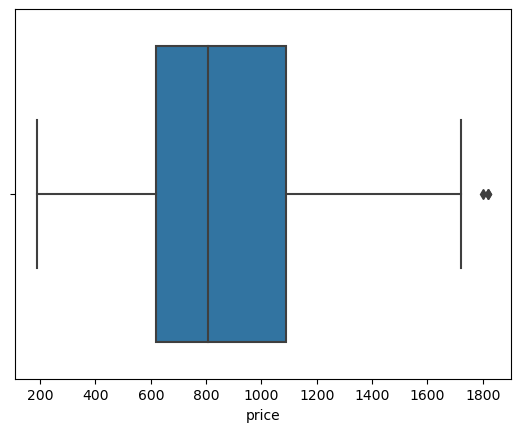

In [23]:
sns.boxplot(x='price', data=df)

In [24]:
df.price

0       970
1      1130
2      1380
3      1390
4       760
       ... 
269     390
270     430
271     390
272     390
273     350
Name: price, Length: 274, dtype: int64

In [25]:
df['price']

0       970
1      1130
2      1380
3      1390
4       760
       ... 
269     390
270     430
271     390
272     390
273     350
Name: price, Length: 274, dtype: int64

In [26]:
hr = pd.read_excel('dataset/hr.xlsx')
hr.head()

,department,job_level,marriage,rating,overtime
0,Sales,Salaried,single,4,14
1,Engineering,Hourly,single,4,8
2,Engineering,Hourly,single,4,4
3,Engineering,Salaried,married,4,0
4,Engineering,Hourly,married,2,21


In [36]:
# overtime의 IQR
hr["overtime"].quantile(.75) - hr["overtime"].quantile(.25)

11.0

In [35]:
# overtime의 범위
hr["overtime"].max() - hr["overtime"].min()

55

In [37]:
# 분산
df["price"].var()

110631.49243335734

In [38]:
# 표준편차 = √분산
df["price"].std()

332.6131272715455

In [41]:
# 신뢰구간 구하기
# !pip install pingouin

In [42]:
import pingouin as pg
pg.ttest(df["price"], 0, confidence=0.95)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,42.483582,273,two-sided,2.486212e-122,"[814.1, 893.22]",2.566527,2.773e+118,1.0


In [44]:
pg.ttest(df["price"], 0, confidence=0.99)

,T,dof,alternative,p-val,CI99%,cohen-d,BF10,power
T-test,42.483582,273,two-sided,2.486212e-122,"[801.537871688669, 905.7832961945428]",2.566527,2.773e+118,1.0


In [45]:
import numpy as np
import scipy

scipy.stats.bootstrap([df.price], np.mean)

BootstrapResult(confidence_interval=ConfidenceInterval(low=815.5602380171526, high=893.324336435411), standard_error=20.066979200464466)

In [46]:
# 귀무가설 : 설마 900만원은 아니겠지?
# 유의 수준은 보통 5%(0.05)로 잡는다
# p 값(p-val) : 귀무가설을 바탕으로 데이터에서 관찰된 결과와 그 이상의 극단적 결과가 나올 확률
pg.ttest(df["price"], 900, confidence=0.95)
# 유의수준을 넘기지 못함 -> 통계적 유의함 -> 귀무가설 기각 -> 900만원은 아니다

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-2.306144,273,two-sided,0.021852,"[814.1, 893.22]",0.139319,0.917,0.632352


In [47]:
# 귀무가설 : 설마 900만원은 아니겠지?
pg.ttest(df["price"], 850, confidence=0.95)
# 유의수준을 넘겨 결론 유보

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.182174,273,two-sided,0.855581,"[814.1, 893.22]",0.011006,0.069,0.053784


In [48]:
sp = pd.read_excel("dataset/sp500_gold.xlsx")

In [52]:
# SPX = 미국 주가 지수
# GLD = 금 가격 지수
sp.head()

,Date,SPX,GLD
0,Dec 04,1211.92,43.80
1,Jan 05,1181.27,42.22
2,Feb 05,1203.60,43.52
3,Mar 05,1180.59,42.82
4,Apr 05,1156.85,43.35


In [54]:
pg.corr(sp["SPX"], sp["GLD"])

,n,r,CI95%,p-val,BF10,power
pearson,194,0.466896,"[0.35, 0.57]",6.778106e-12,1.261e+09,1.0


In [56]:
from statsmodels.formula.api import ols

m = ols("price ~ mileage", data=df).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                     229.1
Date:                Fri, 07 Oct 2022   Prob (F-statistic):           5.81e-38
Time:                        17:14:05   Log-Likelihood:                -1895.7
No. Observations:                 274   AIC:                             3795.
Df Residuals:                     272   BIC:                             3803.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1258.7668     30.599     41.137      0.000    1198.526    1319.008
mileage       -0.0052      0.000    -15.136      0.000      -0.006      -0.005
==============================================================================
Omnibus:                        0.258   Durbin-Watson:                   1.101
Prob(Omnibus):                  0.879   Jarque-Bera (JB):                0.108
Skew:                           0.032   Prob(JB):                        0.947
Kurtosis:                       3.074   Cond. No.                     1.83e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.83e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [66]:
hr = pd.read_excel('dataset/hr.xlsx')
hr

,department,job_level,marriage,rating,overtime
0,Sales,Salaried,single,4,14
1,Engineering,Hourly,single,4,8
2,Engineering,Hourly,single,4,4
3,Engineering,Salaried,married,4,0
4,Engineering,Hourly,married,2,21
...,...,...,...,...,...
1465,Engineering,Hourly,married,3,7
1466,Engineering,Hourly,married,4,4
1467,Engineering,Salaried,married,4,1
1468,Sales,Hourly,single,3,4


In [67]:
# "예측하고 싶은것 ~ 무엇을 가지고 + 무엇을 가지고"
# coef : 기울기
# p>|t| : p-value
m = ols("rating ~ overtime + marriage", data=hr).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     6.049
Date:                Fri, 07 Oct 2022   Prob (F-statistic):            0.00242
Time:                        17:51:07   Log-Likelihood:                -2181.2
No. Observations:                1470   AIC:                             4368.
Df Residuals:                    1467   BIC:                             4384.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              2.9606      0.048     61.458      0.000       2.866       3.055
marriage[T.single]    -0.1740      0.056     -3.120      0.002      -0.283      -0.065
overtime              -0.0044      0.003     -1.497      0.134      -0.010       0.001
==============================================================================
Omnibus:                       50.059   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.948
Skew:                           0.127   Prob(JB):                     2.32e-06
Kurtosis:                       2.400   Cond. No.                         31.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""